In [12]:
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os


class Dataset(Dataset):
    

    # Constructor
    def __init__(self,transform=None,train=True):
        directory= "/Users/ashit/Resnet18"
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)

# Preparing a pre-trained resnet18 model
model = models.resnet18(pretrained = True)

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

composed = transforms.Compose([transforms.ToPILImage(), transforms.Resize(224), transforms.ToTensor(), transforms.Normalize(mean, std)])

# Creating train and validation dataset
train_dataset = Dataset(transform = composed, train = True)
validation_dataset = Dataset(transform = composed, train= False)



for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(512,7)

criterion = nn.CrossEntropyLoss()

# Train the Model
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=16)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size=16)

# Using the following optimizer to minimize the loss
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

n_epochs=1
loss_list=[]
accuracy_list=[]
correct=0
N_test = len(validation_dataset)
N_train = len(train_dataset)
start_time = time.time()
k=1
m=1
Loss=0
start_time = time.time()
print("Started")
print(len(train_dataset))
print(len(validation_dataset))
for epoch in range(n_epochs):
    loss_sublist = []
    for x, y in train_loader:
        model.train()
        loss_sublist.append(loss.data.item())
        print("Train",k)
        k = k+1
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z,y)
        loss.backward()
        optimizer.step()
    loss_list.append(np.mean(loss_sublist))
    
    for x_test, y_test in validation_loader:
        print("Validation",m)
        m = m+1
        model.eval()
        z = model(x_test)
        _, yhat = torch.max(z.data,1)
        correct += (yhat==y_test).sum().item()
        
    accuracy=correct/N_test   
    accuracy_list.append(accuracy)
    
print("Finally Done")

Started
30000
10000
Train 1
Train 2
Train 3
Train 4
Train 5
Train 6
Train 7
Train 8
Train 9
Train 10
Train 11
Train 12
Train 13
Train 14
Train 15
Train 16
Train 17
Train 18
Train 19
Train 20
Train 21
Train 22
Train 23
Train 24
Train 25
Train 26
Train 27
Train 28
Train 29
Train 30
Train 31
Train 32
Train 33
Train 34
Train 35
Train 36
Train 37
Train 38
Train 39
Train 40
Train 41
Train 42
Train 43
Train 44
Train 45
Train 46
Train 47
Train 48
Train 49
Train 50
Train 51
Train 52
Train 53
Train 54
Train 55
Train 56
Train 57
Train 58
Train 59
Train 60
Train 61
Train 62
Train 63
Train 64
Train 65
Train 66
Train 67
Train 68
Train 69
Train 70
Train 71
Train 72
Train 73
Train 74
Train 75
Train 76
Train 77
Train 78
Train 79
Train 80
Train 81
Train 82
Train 83
Train 84
Train 85
Train 86
Train 87
Train 88
Train 89
Train 90
Train 91
Train 92
Train 93
Train 94
Train 95
Train 96
Train 97
Train 98
Train 99
Train 100
Train 101
Train 102
Train 103
Train 104
Train 105
Train 106
Train 107
Train 108
Train 10

Train 830
Train 831
Train 832
Train 833
Train 834
Train 835
Train 836
Train 837
Train 838
Train 839
Train 840
Train 841
Train 842
Train 843
Train 844
Train 845
Train 846
Train 847
Train 848
Train 849
Train 850
Train 851
Train 852
Train 853
Train 854
Train 855
Train 856
Train 857
Train 858
Train 859
Train 860
Train 861
Train 862
Train 863
Train 864
Train 865
Train 866
Train 867
Train 868
Train 869
Train 870
Train 871
Train 872
Train 873
Train 874
Train 875
Train 876
Train 877
Train 878
Train 879
Train 880
Train 881
Train 882
Train 883
Train 884
Train 885
Train 886
Train 887
Train 888
Train 889
Train 890
Train 891
Train 892
Train 893
Train 894
Train 895
Train 896
Train 897
Train 898
Train 899
Train 900
Train 901
Train 902
Train 903
Train 904
Train 905
Train 906
Train 907
Train 908
Train 909
Train 910
Train 911
Train 912
Train 913
Train 914
Train 915
Train 916
Train 917
Train 918
Train 919
Train 920
Train 921
Train 922
Train 923
Train 924
Train 925
Train 926
Train 927
Train 928
Train 929


Train 1591
Train 1592
Train 1593
Train 1594
Train 1595
Train 1596
Train 1597
Train 1598
Train 1599
Train 1600
Train 1601
Train 1602
Train 1603
Train 1604
Train 1605
Train 1606
Train 1607
Train 1608
Train 1609
Train 1610
Train 1611
Train 1612
Train 1613
Train 1614
Train 1615
Train 1616
Train 1617
Train 1618
Train 1619
Train 1620
Train 1621
Train 1622
Train 1623
Train 1624
Train 1625
Train 1626
Train 1627
Train 1628
Train 1629
Train 1630
Train 1631
Train 1632
Train 1633
Train 1634
Train 1635
Train 1636
Train 1637
Train 1638
Train 1639
Train 1640
Train 1641
Train 1642
Train 1643
Train 1644
Train 1645
Train 1646
Train 1647
Train 1648
Train 1649
Train 1650
Train 1651
Train 1652
Train 1653
Train 1654
Train 1655
Train 1656
Train 1657
Train 1658
Train 1659
Train 1660
Train 1661
Train 1662
Train 1663
Train 1664
Train 1665
Train 1666
Train 1667
Train 1668
Train 1669
Train 1670
Train 1671
Train 1672
Train 1673
Train 1674
Train 1675
Train 1676
Train 1677
Train 1678
Train 1679
Train 1680
Train 1681

Validation 346
Validation 347
Validation 348
Validation 349
Validation 350
Validation 351
Validation 352
Validation 353
Validation 354
Validation 355
Validation 356
Validation 357
Validation 358
Validation 359
Validation 360
Validation 361
Validation 362
Validation 363
Validation 364
Validation 365
Validation 366
Validation 367
Validation 368
Validation 369
Validation 370
Validation 371
Validation 372
Validation 373
Validation 374
Validation 375
Validation 376
Validation 377
Validation 378
Validation 379
Validation 380
Validation 381
Validation 382
Validation 383
Validation 384
Validation 385
Validation 386
Validation 387
Validation 388
Validation 389
Validation 390
Validation 391
Validation 392
Validation 393
Validation 394
Validation 395
Validation 396
Validation 397
Validation 398
Validation 399
Validation 400
Validation 401
Validation 402
Validation 403
Validation 404
Validation 405
Validation 406
Validation 407
Validation 408
Validation 409
Validation 410
Validation 411
Validation

In [16]:
print(accuracy)

0.9713
[0.9713]


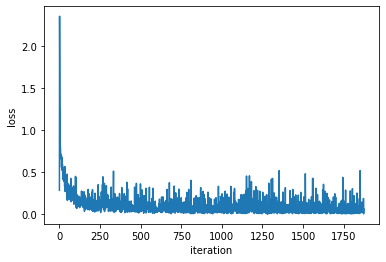

In [21]:
plt.plot(loss_sublist)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [23]:
# To find the misclassified samples
count = 0
max_num_of_items = 4  # first four mis-classified samples
validation_loader_batch_one = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1)

for i, (x_test, y_test) in enumerate(validation_loader_batch_one):
    # set model to eval
    model.eval()
    
    # make a prediction
    z = model(x_test)
    
    # find max
    _, yhat = torch.max(z.data, 1)
    
    # print mis-classified samples
    if yhat != y_test:
        print("Sample : {}; Expected Label: {}; Obtained Label: {}".format(str(i), str(y_test), str(yhat)))
        count += 1
        if count >= max_num_of_items:
            break

Sample : 0; Expected Label: tensor([1]); Obtained Label: tensor([0])
Sample : 18; Expected Label: tensor([1]); Obtained Label: tensor([0])
Sample : 44; Expected Label: tensor([1]); Obtained Label: tensor([0])
Sample : 48; Expected Label: tensor([1]); Obtained Label: tensor([0])


In [ ]:
"Hence the batch_size we used is 16 , therefore our graph took 1875 iterations. If we set batch_size = 100 , the iterations simply will be 300."
"if batch_size = 16"
"for training : 30000/16 = 1875 iterations"
"for validation: 10000/16 = 625 iterations"

"if batch_size = 100"
"for training : 30000/100 = 300 iterations"
"for validation: 10000/100 = 100 iterations"

"Hope you understood"